# import thư viện

In [1]:
import pandas_ta as ta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_btc = pd.read_csv('/Users/dophi/Desktop/LSTM_ETH/eda/BTCUSDT_1d_cleaned.csv')
df_eth = pd.read_csv('/Users/dophi/Desktop/LSTM_ETH/eda/ETHUSDT_1d_cleaned.csv')

In [3]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close: pandas.core.series.Series, length: Union[int, numpy.integer] = None, scalar: Union[int, numpy.integer, float, numpy.floating] = None, mamode: str = None, talib: bool = None, drift: Union[int, numpy.integer] = None, offset: Union[int, numpy.integer] = None, **kwargs: Optional[dict]) -> pandas.core.series.Series
    Relative Strength Index

    This oscillator used to attempts to quantify "velocity" and "magnitude".

    Sources:
        * [tradingview](https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI))

    Parameters:
        close (Series): ```close``` Series
        length (int): The period. Default: ```14```
        scalar (float): Scalar. Default: ```100```
        mamode (str): See ```help(ta.ma)```. Default: ```"rma"```
        talib (bool): If installed, use TA Lib. Default: ```True```
        drift (int): Difference amount. Default: ```1```
        offset (int): Post shift. Default: ```0```

    Oth

# áp dụng chỉ số RSI vào dữ liệu

In [4]:
df_btc["rsi"] = ta.rsi(df_btc["close"], length = 14)
df_eth["rsi"] = ta.rsi(df_eth["close"], length = 14)

In [5]:
df_btc.head(15)

,open_time,open,high,low,close,volume,rsi
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,0.000000
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.357328
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.324445
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1.280701
5,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858,2.465236
6,2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565,6.202891
7,2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753,15.698458
8,2017-08-25,4316.01,4453.91,4247.48,4280.68,573.612740,15.404718
9,2017-08-26,4280.71,4367.00,4212.41,4337.44,228.108068,18.057478


In [6]:
df_eth.head(15)

,open_time,open,high,low,close,volume,rsi
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034,NaN
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,0.000000
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,0.000000
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.577971
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,25.528580
5,2017-08-22,321.04,330.41,144.21,309.80,7956.35088,22.861868
6,2017-08-23,312.25,324.99,309.41,315.74,8665.72569,26.502536
7,2017-08-24,315.74,328.04,314.01,323.42,6753.27192,31.034664
8,2017-08-25,323.42,338.28,323.42,327.24,7125.96962,33.239795
9,2017-08-26,327.24,335.44,323.41,330.79,4877.68521,35.309894


- Khi tính chỉ báo RSI với chu kỳ n (thường là 14), các giá trị RSI ở những hàng đầu tiên luôn không ổn định và không phản ánh đúng động lượng thị trường.
- tính RSI bằng SMA thuần túy thì cần bỏ đúng n hàng (ví dụ 14 hàng). Còn khi dùng EMA như các thư viện hiện đại (pandas-ta, ta-lib, TradingView), RSI sẽ ổn định sớm hơn, nên chỉ cần loại bỏ khoảng 5–10 hàng đầu tiên.

# tính thay đổi phần trăm giá đóng cửa hàng ngày

In [7]:
df_btc['pct_change'] = df_btc['close'].pct_change() * 100
df_eth['pct_change'] = df_eth['close'].pct_change() * 100

In [8]:
df_btc.head(10)

,open_time,open,high,low,close,volume,rsi,pct_change
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,0.000000,-4.123844
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.357328,0.769405
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.324445,-1.296866
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1.280701,-1.720142
5,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858,2.465236,0.597610
6,2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565,6.202891,1.831931
7,2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753,15.698458,4.910051
8,2017-08-25,4316.01,4453.91,4247.48,4280.68,573.612740,15.404718,-0.818580
9,2017-08-26,4280.71,4367.00,4212.41,4337.44,228.108068,18.057478,1.325958


In [9]:
df_eth.head(10)

,open_time,open,high,low,close,volume,rsi,pct_change
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034,NaN,NaN
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,0.000000,-2.662252
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,0.000000,-1.037556
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.577971,2.815304
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,25.528580,8.087596
5,2017-08-22,321.04,330.41,144.21,309.80,7956.35088,22.861868,-4.172724
6,2017-08-23,312.25,324.99,309.41,315.74,8665.72569,26.502536,1.917366
7,2017-08-24,315.74,328.04,314.01,323.42,6753.27192,31.034664,2.432381
8,2017-08-25,323.42,338.28,323.42,327.24,7125.96962,33.239795,1.181127
9,2017-08-26,327.24,335.44,323.41,330.79,4877.68521,35.309894,1.084831


In [10]:
df_btc.describe()

,open,high,low,close,volume,rsi,pct_change
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3020.000000,3020.000000
mean,35233.027891,35990.941804,34414.321632,35260.407464,63082.335757,52.272759,0.165119
std,31720.042328,32236.984687,31164.663779,31728.916035,77158.580370,13.993998,3.595957
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,0.000000,-39.504847
25%,9116.160000,9279.540000,8806.380000,9128.020000,24883.450665,42.826183,-1.383968
50%,25792.110000,26106.480000,25166.000000,25805.050000,40113.310690,51.023438,0.071556
75%,53555.000000,55195.840000,51214.600000,53601.050000,66681.334275,61.506472,1.627375
max,124658.540000,126199.630000,123084.000000,124658.540000,760705.362783,93.453830,22.501393


In [11]:
df_eth.describe()

,open,high,low,close,volume,rsi,pct_change
count,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03,3020.000000,3020.000000
mean,1627.853774,1675.210053,1575.063217,1628.681466,5.324266e+05,51.288374,0.182391
std,1297.125278,1331.606347,1258.446124,1297.086940,4.498646e+05,13.506296,4.628084
min,83.750000,85.000000,81.790000,83.760000,1.060567e+03,0.000000,-44.596886
25%,304.510000,314.410000,292.110000,304.720000,2.433029e+05,41.848855,-1.981776
50%,1594.580000,1646.520000,1554.440000,1595.670000,4.211561e+05,50.018327,0.068896
75%,2607.420000,2680.340000,2523.740000,2607.680000,6.958760e+05,60.447611,2.239036
max,4832.070000,4956.780000,4713.890000,4832.070000,4.663240e+06,89.791028,26.332887


# vì khi áp dụng rsi sẽ phải loại bỏ một số hàng đầu và em sẽ loại bỏ thêm các cột không cần thiết như open, high, low, open_time vì open high low là cấu trúc hình thành giá close nên sẽ tương quan gần như bằng 1, và open_time không cần thiết khi đưa vào mô hình

In [12]:
df_btc = df_btc.iloc[14:].reset_index(drop=True)
df_eth = df_eth.iloc[14:].reset_index(drop=True)

In [13]:
df_btc = df_btc.drop(columns=['open_time', 'high', 'low', 'open'])
df_eth = df_eth.drop(columns=['open_time'])

In [14]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close       3007 non-null   float64
 1   volume      3007 non-null   float64
 2   rsi         3007 non-null   float64
 3   pct_change  3007 non-null   float64
dtypes: float64(4)
memory usage: 94.1 KB


In [15]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3007 non-null   float64
 1   high        3007 non-null   float64
 2   low         3007 non-null   float64
 3   close       3007 non-null   float64
 4   volume      3007 non-null   float64
 5   rsi         3007 non-null   float64
 6   pct_change  3007 non-null   float64
dtypes: float64(7)
memory usage: 164.6 KB


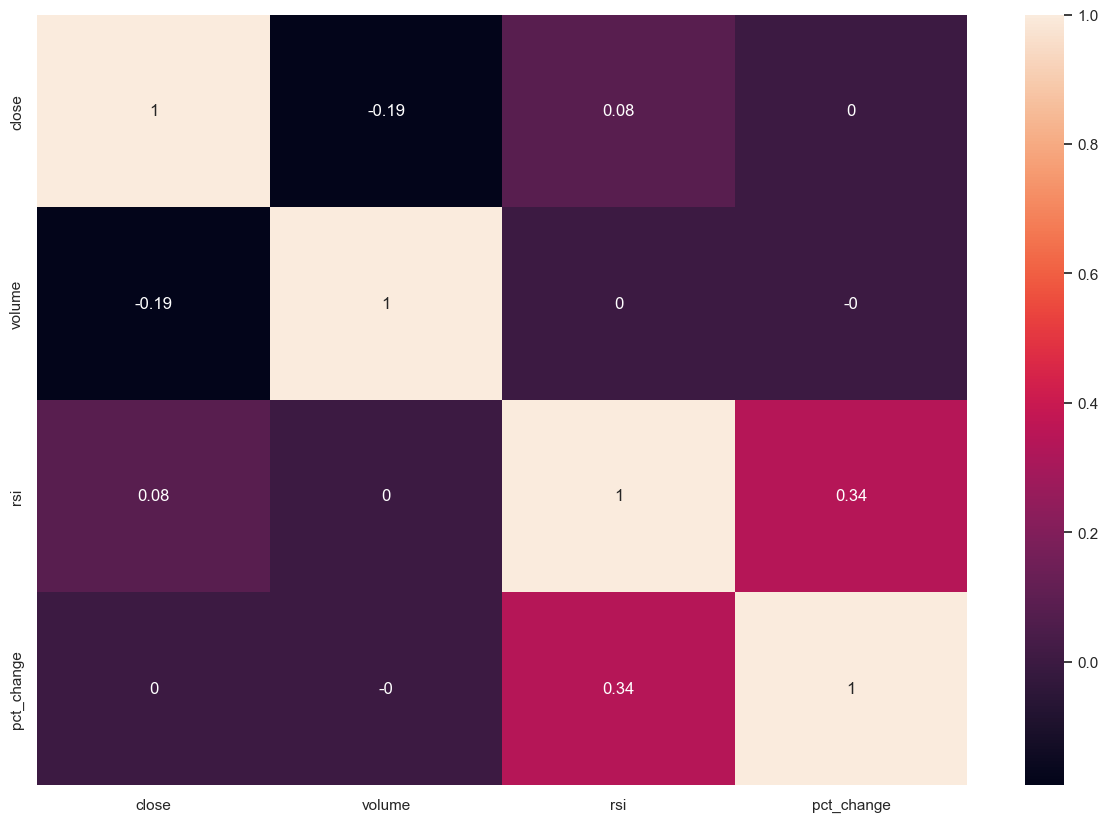

In [16]:
correlation_matrix = df_btc.corr().round(2)
plt.figure(figsize=(15,10))
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

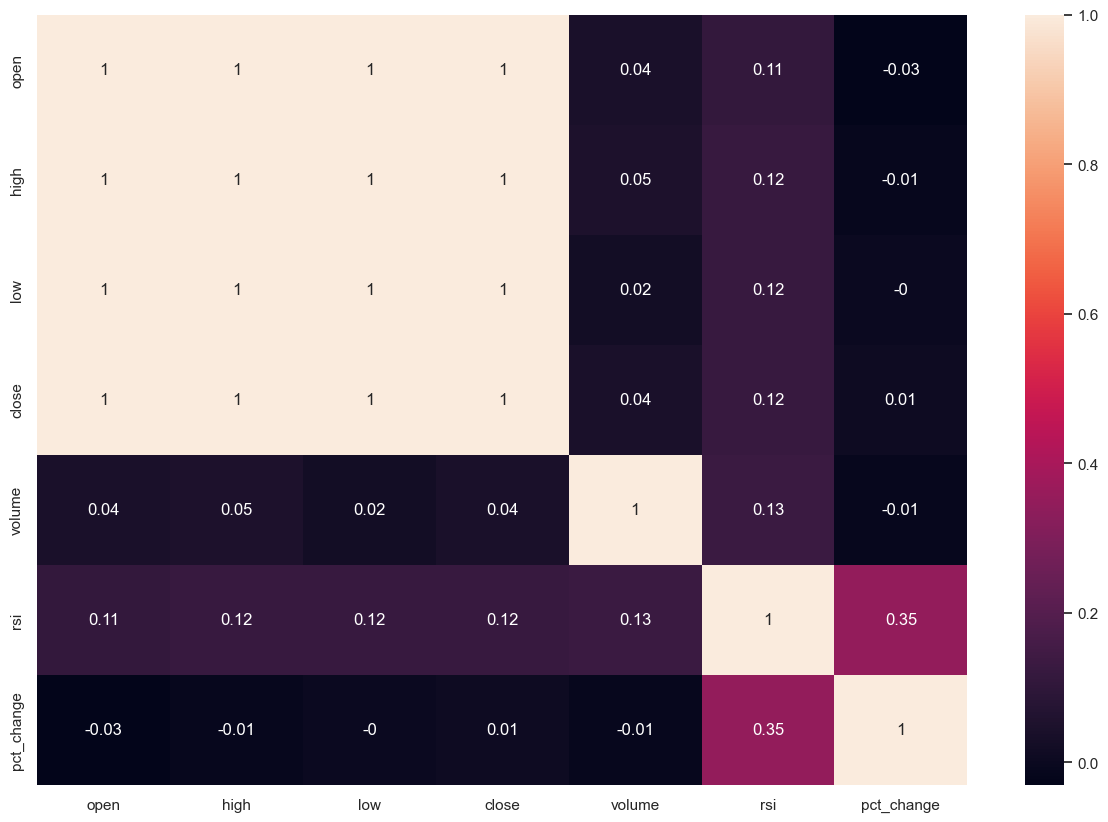

In [17]:
correlation_matrix = df_eth.corr().round(2)
plt.figure(figsize=(15,10))
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [18]:
df_btc.to_csv('/Users/dophi/Desktop/LSTM_ETH/Test/BTCUSDT_1d_fe.csv', index=False)